<a href="https://colab.research.google.com/github/SirimarcoUERJ/MachineLearning/blob/main/Data_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bilbiotecas.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Explorar Dados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_census = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learn/data/census.csv")

In [ ]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Visualização dos dados.

In [ ]:
np.unique(base_census["income"], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

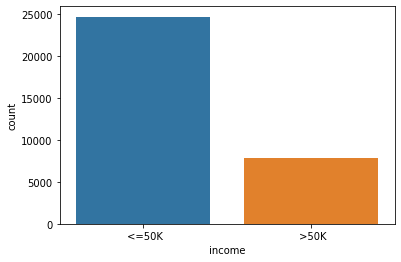

In [ ]:
sns.countplot(x = base_census["income"]);

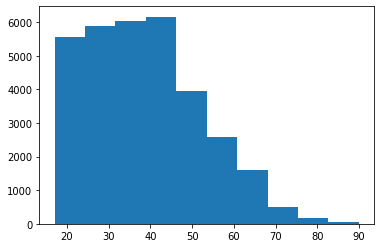

In [ ]:
plt.hist(base_census["age"]);

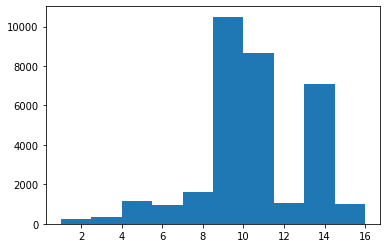

In [ ]:
plt.hist(base_census["education-num"]);

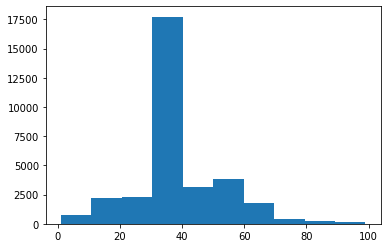

In [ ]:
plt.hist(base_census["hour-per-week"]);

In [ ]:
grafico = px.treemap(base_census, path=["workclass","age"])
grafico.show();

In [ ]:
grafico = px.treemap(base_census, path = ["occupation", "relationship"])
grafico.show();

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=["occupation", "relationship"])
grafico.show();

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=["workclass", "occupation", "income"])
grafico.show();

In [ ]:
grafico = px.parallel_categories(base_census, dimensions= ["sex", "race","income"])
grafico.show();

Divisão entre previsores e classes.

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
X_census = base_census.iloc[:,0:14].values

In [ ]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
Y_census = base_census.iloc[:,14].values

In [ ]:
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

Tratando atributos categóricos.

LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Label_Encoder_test = LabelEncoder()

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
teste = Label_Encoder_test.fit_transform(X_census[:,1]) #cada valor unico é transformado em um numero.

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
workclass = LabelEncoder()
education = LabelEncoder()
marital = LabelEncoder()
occupation = LabelEncoder()
relationship = LabelEncoder()
race = LabelEncoder()
sex = LabelEncoder()
country = LabelEncoder()

In [ ]:
X_census[:,1] = workclass.fit_transform(X_census[:,1])
X_census[:,3] = education.fit_transform(X_census[:,3])
X_census[:,5] = marital.fit_transform(X_census[:,5])
X_census[:,6] = occupation.fit_transform(X_census[:,6])
X_census[:,7] = relationship.fit_transform(X_census[:,7])
X_census[:,8] = race.fit_transform(X_census[:,8])
X_census[:,9] = sex.fit_transform(X_census[:,9])
X_census[:,13] = country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

OneHotEncoder

In [ ]:
# Carro

# gol palio uno
#  1    2    3

# encode

# gol   1 0 0
# palio 0 1 0
# uno   0 0 1 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[("PneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder= "passthrough") #remainder=passthrough é pra ele n apagar os dados anteriores

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape #108 colunas é a nova quantidade de colunas da base de dados
# e é equivalente ao numero de valores unicos que existem na base de dados.

(32561, 108)

Escalonamento dos valores.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:

X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

Separando dados de treino e dados de teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(X_census_treinamento, X_census_teste, Y_census_treinamento, Y_census_teste) = train_test_split(X_census, Y_census, test_size=0.15, random_state=0)

In [ ]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

Salvando Dados.

In [ ]:
import pickle

In [ ]:
with open("census.pkl", mode="wb") as f:
  pickle.dump([X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste], f)